In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#!pip install ydata_profiling
!pip install optbinning


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.5/304.5 kB 19.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3


# Contexto de la Base de Datos


Lo dos conjuntos de datos están relacionados con variantes rojas y blancas del vino portugués "Vinho Verde". Para más detalles, consulte la referencia. Debido a cuestiones de privacidad y logística, solo están disponibles las variables fisicoquímicas entradas y sensoriales salida por ejemplo, no hay datos sobre tipos de uva, marca de vino, precio de venta del vino, etc.


#Objetivo de la Base de Datos

Identificar qué características químicas influyen en la calidad de los vinos rojos.
Comparar vinos de diferentes regiones para determinar si hay diferencias significativas en sus atributos.
Construir modelos predictivos para estimar la calidad del vino basados en sus atributos químicos.
Explorar las relaciones entre las diferentes variables y su impacto en la percepción sensorial del vino.



# Curiosidad:
Se quiere saber que variables afectan más la calidad  de un vino

In [3]:
import pandas as pd #libreria de lectura de doc, matemática etc...
import numpy as np #Librería de algebra, y clave del data Science
import seaborn as sns # Una de las muchas  librerias para gráficos(con la que tengo familiaridad)
import scipy.stats as stats #Liberia de estadística
from matplotlib import pyplot as plt
import plotly.express as px
import random
#import ydata_profiling
#Se agregarán más en cuanto avance el temario de clase


In [4]:
df = pd.read_csv("/content/drive/MyDrive/EstadisticaProyecto/VinoRojo/winequality-red.csv")
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#limites del dataset son [0,1599]
tam_muestra = 560
vinos = df.sample(n=tam_muestra, random_state=42) #es una muestra aleatoria de 560 registros


# Descripción de las variables del DataSet
#Variables Numéricas
Fixed acidity (Acidez fija): Se refiere a la cantidad de ácido tartárico presente en el vino. Este ácido puede afectar la sensación de acidez en la boca y desempeñar un papel en el equilibrio general del vino.

Volatile acidity (Acidez volátil): Indica la cantidad de ácidos volátiles, como el ácido acético, en el vino. Altos niveles de acidez volátil pueden resultar en un aroma desagradable a vinagre.

Citric acid (Ácido cítrico): Es el ácido cítrico presente en el vino. A menudo, se encuentra en pequeñas cantidades y puede proporcionar una sensación de frescura o acidez.

Residual sugar (Azúcar residual): Hace referencia a la cantidad de azúcar que queda después de que la fermentación ha convertido la mayor parte del azúcar en alcohol. El azúcar residual puede influir en el sabor y el dulzor percibido del vino.

Chlorides (Cloruros): Se refiere a la concentración de iones de cloruro en el vino. Los cloruros en niveles adecuados pueden contribuir al equilibrio y la complejidad del vino, pero en exceso pueden tener un sabor salado.

Free sulfur dioxide (Dióxido de azufre libre): Indica la cantidad de dióxido de azufre (SO2) libre en el vino. El dióxido de azufre tiene propiedades antioxidantes y antimicrobianas, y su presencia puede ayudar a preservar el vino.

Total sulfur dioxide (Dióxido de azufre total): Representa tanto el dióxido de azufre libre como el dióxido de azufre combinado con otras sustancias en el vino. Nuevamente, el dióxido de azufre se utiliza para preservar el vino y prevenir la oxidación.

Density (Densidad): Es la densidad del vino en relación con el agua. La densidad puede influir en la textura y la sensación en boca del vino.

pH: Indica el nivel de acidez o alcalinidad del vino en una escala numérica. Los vinos con un pH bajo son más ácidos, mientras que los vinos con un pH alto son más alcalinos.

Sulphates (Sulfatos): Se refiere a la concentración de sulfatos en el vino. Los sulfatos también actúan como conservantes y pueden contribuir al aroma y la estabilidad del vino.

Alcohol: Es el porcentaje de contenido alcohólico en el vino. El nivel de alcohol puede influir en el cuerpo, la sensación en boca y el equilibrio general del vino.

#Variables Categóricas
Quality (Calidad): Es una variable que indica la calidad del vino, generalmente en una escala numérica o de clasificación. El valor de esta variable puede ser subjetivo y depende de los criterios de evaluación utilizados.

In [6]:
vinos.nunique()

fixed acidity            83
volatile acidity        112
citric acid              71
residual sugar           59
chlorides               106
free sulfur dioxide      52
total sulfur dioxide    121
density                 248
pH                       78
sulphates                75
alcohol                  50
quality                   6
dtype: int64

In [7]:
vinos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000
mean,8.384107,0.519116,0.273786,2.516607,0.087977,15.683929,45.632143,0.996723,3.303232,0.657036,10.417232,5.657143
std,1.830681,0.182583,0.193873,1.382180,0.048853,10.779922,32.645703,0.001966,0.153684,0.160892,1.067156,0.809350
min,5.000000,0.120000,0.000000,1.200000,0.039000,1.000000,6.000000,0.990800,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.100000,1.900000,0.069750,7.000000,21.000000,0.995500,3.200000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,13.000000,36.500000,0.996620,3.310000,0.620000,10.100000,6.000000
75%,9.500000,0.630000,0.420000,2.600000,0.090000,22.000000,60.250000,0.997900,3.400000,0.740000,11.200000,6.000000
max,15.500000,1.580000,0.790000,15.400000,0.464000,72.000000,278.000000,1.003690,4.010000,1.950000,14.000000,8.000000


In [8]:
factor = list(vinos.loc[:,vinos.nunique() < 10]);
vinos[factor] = vinos[factor].astype('category')
vinos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560 entries, 803 to 1405
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         560 non-null    float64 
 1   volatile acidity      560 non-null    float64 
 2   citric acid           560 non-null    float64 
 3   residual sugar        560 non-null    float64 
 4   chlorides             560 non-null    float64 
 5   free sulfur dioxide   560 non-null    float64 
 6   total sulfur dioxide  560 non-null    float64 
 7   density               560 non-null    float64 
 8   pH                    560 non-null    float64 
 9   sulphates             560 non-null    float64 
 10  alcohol               560 non-null    float64 
 11  quality               560 non-null    category
dtypes: category(1), float64(11)
memory usage: 53.3 KB


# Descripción del Análisis

Escogí este conjunto de datos ya que tenía curiosidad por saber que atributos son los que más afectan al sabor/calidad de un vino.


In [9]:
#ydata_profiling.ProfileReport(vinos)

# Análisis de las Distribuciones de las Variables del Dataset


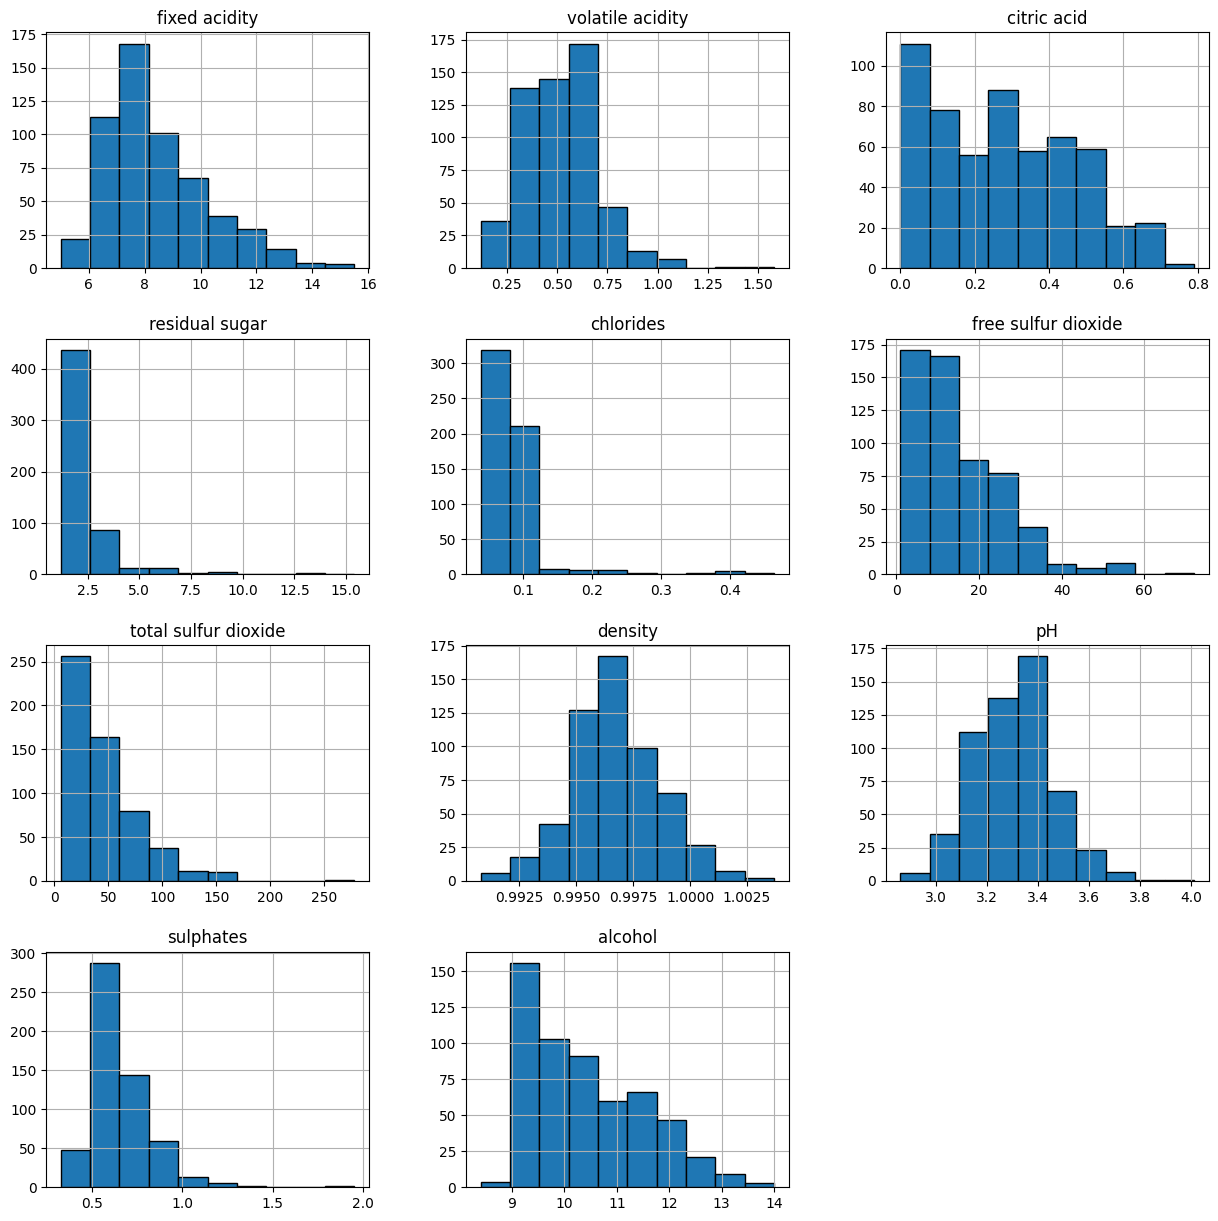

In [10]:
vinos.hist(edgecolor='black',figsize=(15,15))
plt.show()

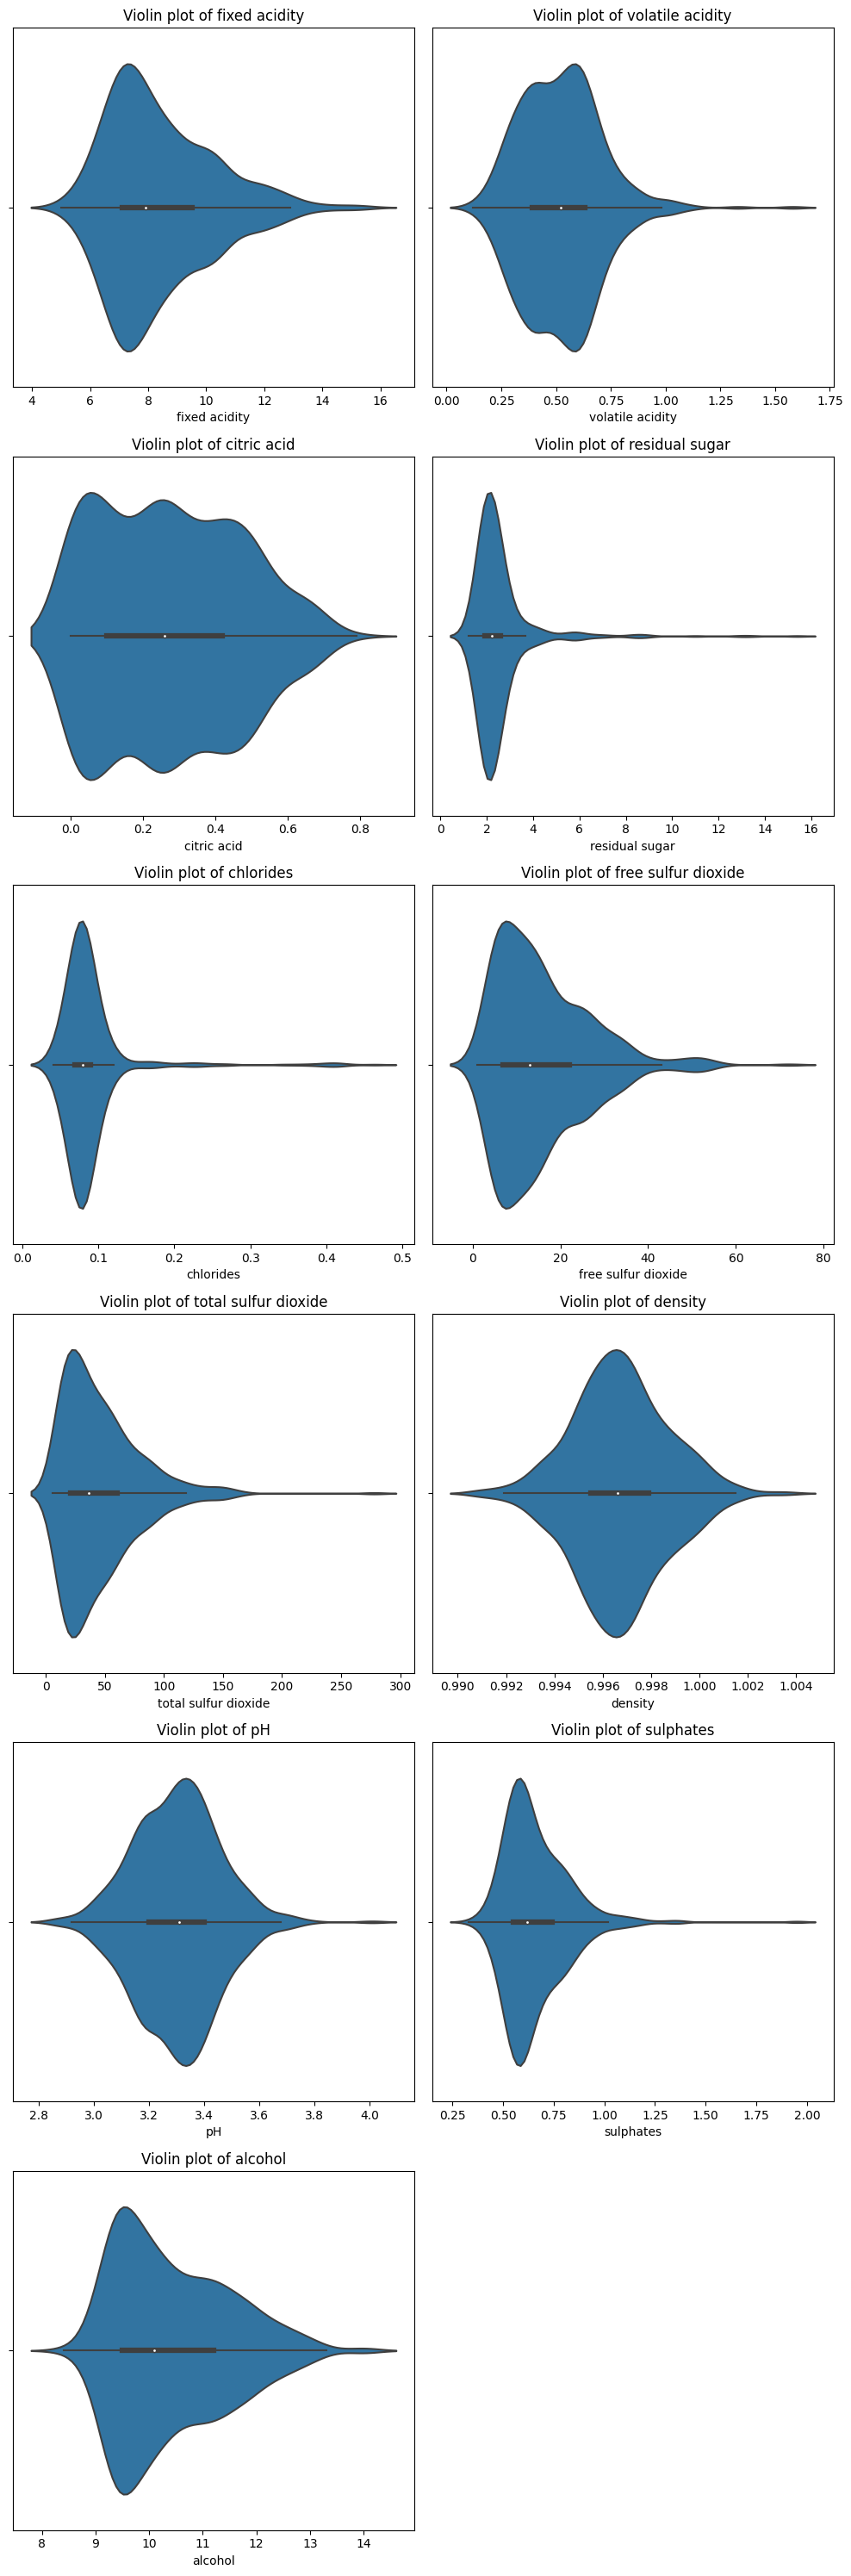

In [11]:
# Obtener las columnas numéricas (excluyendo 'Outcome')
numeric_columns = vinos.select_dtypes(include=['float64', 'int64']).columns



num_columns = len(numeric_columns)
num_rows = (num_columns + 1) // 2



plt.figure(figsize=(10, 5*num_rows))



for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, 2, i+1)
    sns.violinplot(x=vinos[column])
    plt.title(f'Violin plot of {column}')



plt.tight_layout()
plt.show()

# Análisis Univariante


In [12]:
vinos.quality.value_counts()

5    233
6    225
7     73
4     20
8      7
3      2
Name: quality, dtype: int64

In [13]:
vinos['quality'] = vinos['quality'].apply(lambda x: 1 if x >= 6 else 0)
vinos.quality.value_counts()

1    305
0    255
Name: quality, dtype: int64

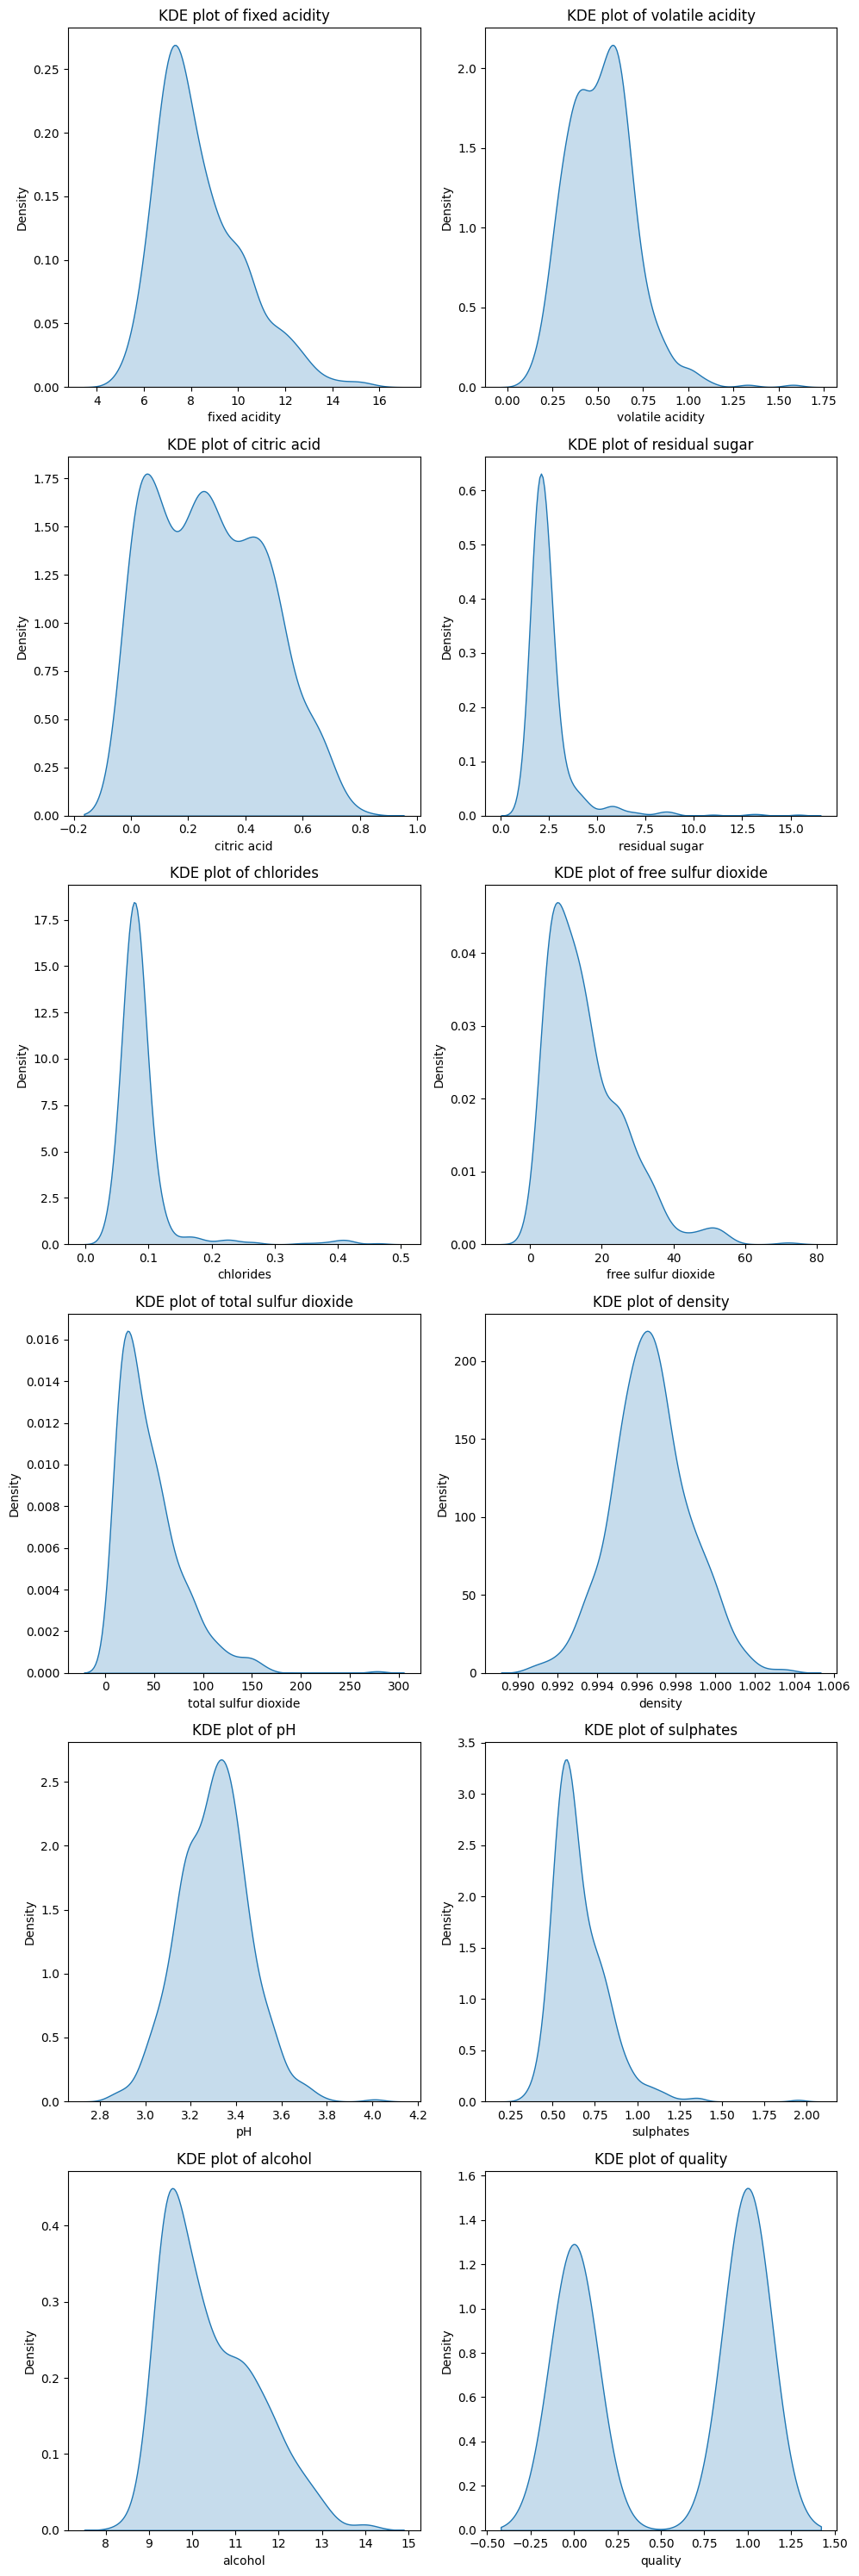

In [14]:
# Obtener las columnas numéricas (excluyendo 'Outcome')
numeric_columns = vinos.select_dtypes(include=['float64', 'int64']).columns



num_columns = len(numeric_columns)
num_rows = (num_columns + 1) // 2



plt.figure(figsize=(10, 5*num_rows))



for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=vinos[column], fill=True)
    plt.title(f'KDE plot of {column}')



plt.tight_layout()
plt.show()

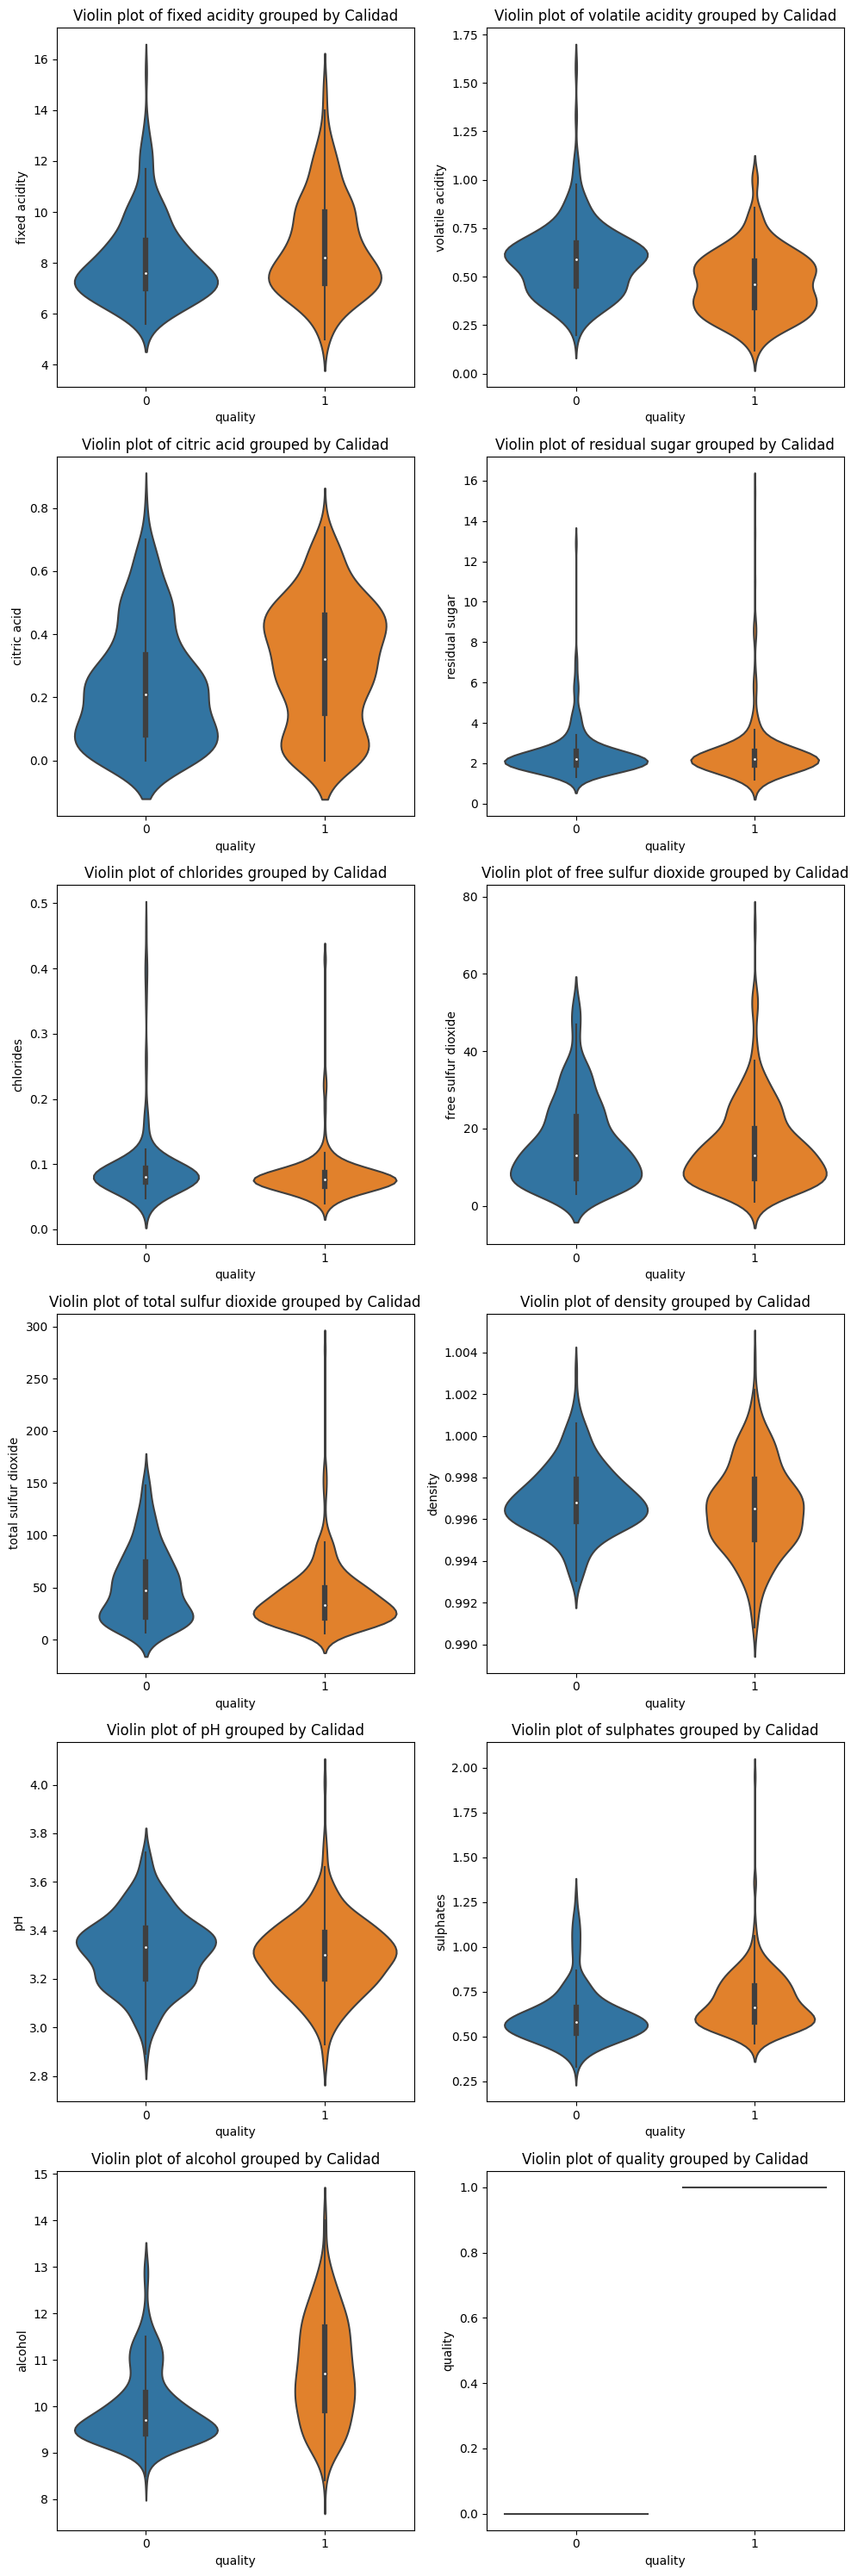

In [15]:
# Obtener las columnas numéricas (excluyendo 'Outcome')
numeric_columns = vinos.select_dtypes(include=['float64', 'int64']).columns
#vinos['quality'] = vinos['quality'].apply(lambda x: 1 if x >= 6 else 0)


num_columns = len(numeric_columns)
num_rows = (num_columns + 1) // 2



plt.figure(figsize=(10, 5*num_rows))



for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, 2, i+1)
    sns.violinplot(data=vinos, x='quality', y=column)
    plt.title(f'Violin plot of {column} grouped by Calidad')



plt.tight_layout()
plt.show()

<ipython-input-16-ae986c390c0b>:16: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=vinos[vinos['quality']==0][column], label='quality=0', fill=True)
<ipython-input-16-ae986c390c0b>:17: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=vinos[vinos['quality']==1][column], label='quality=1', fill=True)


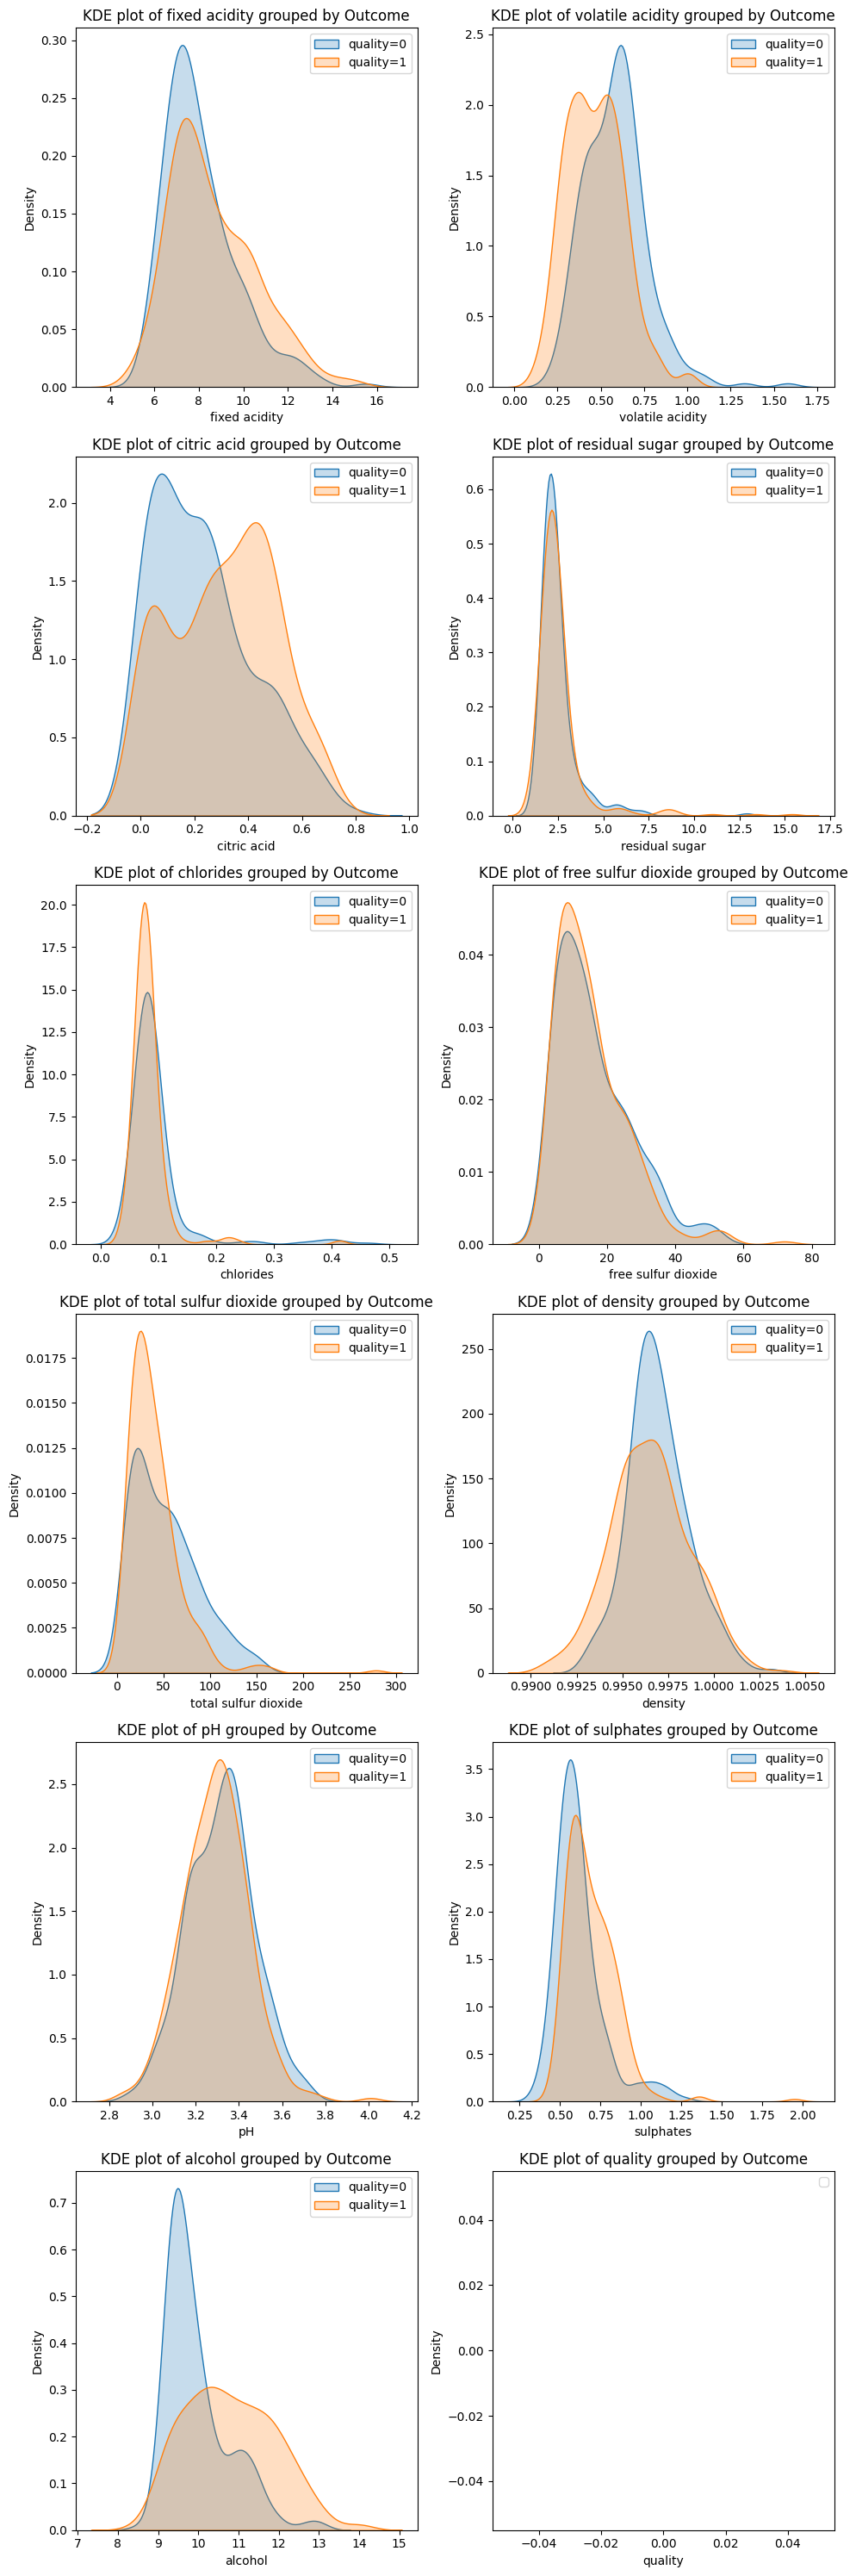

In [16]:
numeric_columns = vinos.select_dtypes(include=['float64', 'int64']).columns



num_columns = len(numeric_columns)
num_rows = (num_columns + 1) // 2



plt.figure(figsize=(10, 5*num_rows))



for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=vinos[vinos['quality']==0][column], label='quality=0', fill=True)
    sns.kdeplot(data=vinos[vinos['quality']==1][column], label='quality=1', fill=True)
    plt.title(f'KDE plot of {column} grouped by Outcome')
    plt.legend()



plt.tight_layout()
plt.show()

# Iterpretación del Análisis Bivariado

#Para la acidez Fija vs Calidad de Vinos
El gráfico KDE y el violínplot nos muestran que siguen distribuciones similares. Sin embargo, los vinos de buena calidad tienen mayor frecuencia en el rango de 10 a 12.5 en el nivel de acidez fija, mientras que los vinos de mala calidad tienden a tener una frecuencia más alta en los niveles de [6, 9] en acidez fija.

#Para la acidez volátil vs Calidad de Vinos
Los vinos de mala calidad tienen una moda definida en 0.73, mientras que los vinos de buena calidad muestran dos puntos máximos. Esto sugiere que la agrupación de las categorías de calidad de vinos 6, 7 y 8 puede estar afectando, ya que dos puntos máximos indican una muestra bimodal. Ambas gráficas tienen una distribución similar a la normal.

#Para los cloruros vs Calidad de Vinos
Ambas distribuciones son similares; la única diferencia es que hay una moda más definida en los vinos de alta calidad debido a que hay más datos que en los vinos de mala calidad. Ambas distribuciones tienen una forma similar a la distribución normal.

#Para el alcohol vs Calidad de Vinos
La moda de la distribución de los vinos de mala calidad está definida entre [9, 10], mientras que la distribución de los vinos de alta calidad sigue una forma similar a la campana de Gauss, donde los datos se centran en el medio de la distribución. A diferencia del grupo de vinos de alta calidad, los vinos de mala calidad raramente superan el 12 % de contenido alcohólico.



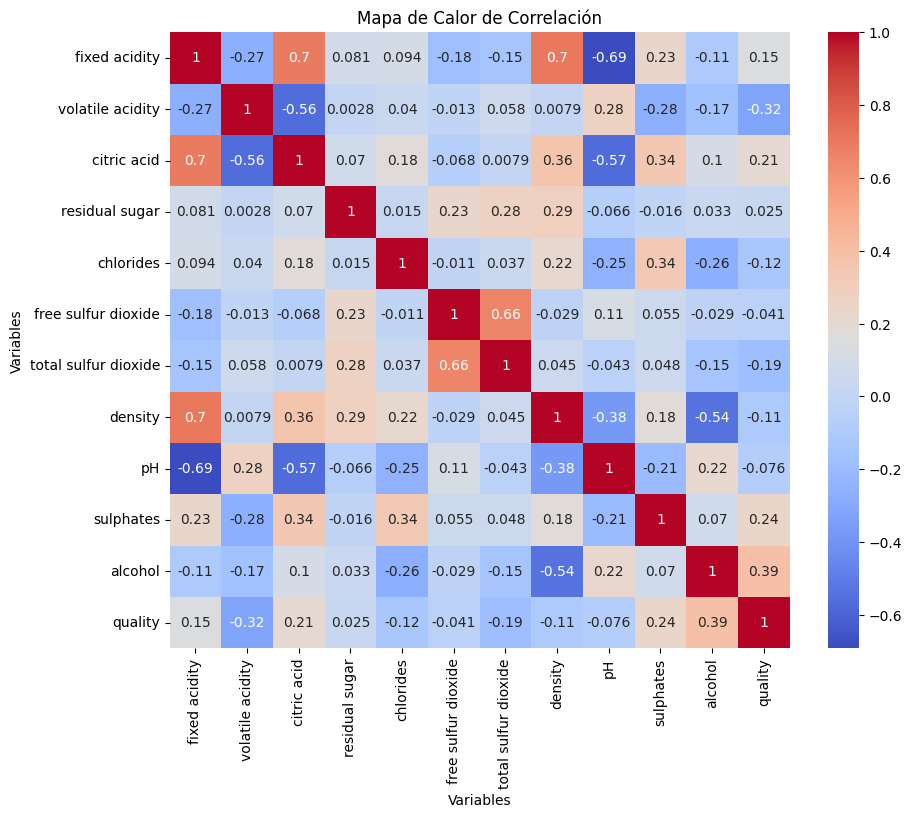

In [17]:
correlation_matrix = vinos.corr()  # Calcula la matriz de correlación
plt.figure(figsize=(10, 8))

# Generar el mapa de calor utilizando Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Personalizar el mapa de calor
plt.title('Mapa de Calor de Correlación')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Mostrar el mapa de calor
plt.show()

# Analisis de las Correlaciones entre las variables
Se realizo un mapa de calor que nos permite observar que tan correlacionadas están las variables entre sí. Debido a que la variable que queremos predecir es QUALITY y es categórica, no nos ayudará ya que las variables categóricas no tienen coeficiente de correlación, por lo que como solución a este problema plantemaos usar el coeficiente de Cramer para encontrar los efectos más importantes con respecto a la variable  objetivo.

Este mapa de calor si nos puede ayudar para estudiar el tipo de relacion que existe entre las variables independientes y realizar historiogramas más adelante en el estudio.

In [18]:
# Eliminar variable objetivo continua
varObj = vinos['quality']
imputvinos = vinos.drop(['quality'],axis=1)
imputvinos['aleatorio'] = np.random.uniform(0,1,size=imputvinos.shape[0])
imputvinos['aleatorio2'] = np.random.uniform(0,1,size=imputvinos.shape[0])
vinos['quality'].value_counts()

1    305
0    255
Name: quality, dtype: int64

In [19]:
def cramers_v(var1, varObj):

    if not var1.dtypes == 'category':
        #bins = min(5,var1.value_counts().count())
        var1 = pd.cut(var1, bins = 5)
    if not varObj.dtypes == 'category': #np.issubdtype(varObj, np.number):
        #bins = min(5,varObj.value_counts().count())
        varObj = pd.cut(varObj, bins = 5)

    data = pd.crosstab(var1, varObj).values
    vCramer = stats.contingency.association(data, method = 'cramer')
    return vCramer
# Aplicar la función al input completo contra la objetivo
tablaCramer = pd.DataFrame(imputvinos.apply(lambda x: cramers_v(x,varObj)),columns=['VCramer'])
px.bar(tablaCramer,x=tablaCramer.VCramer,title='Relaciones frente a la calidad de los Vinos').update_yaxes(categoryorder="total ascending")

#Este gráfico nos dice que variables tienen más importancia y más relevancia frente a la variable objetivo,
#esto quiere decir que entre mayor puntuacion se tenga en estas variables,
#mayor probabilidad de que el cliente haya dicho que esta satisfecho y lo mismo en caso contrario.
#USAR ESTA EN CASO DE UN DATASET CON MUCHAS VARIABLES
#cramertop7 = tablaCramer.VCramer.sort_values(ascending=False)[:12]
#cramertop7 = pd.DataFrame(cramertop7,columns=['VCramer'])
#px.bar(cramertop7,x=cramertop7.VCramer,title='Relaciones frente a Satisfacción').update_yaxes(categoryorder="total ascending").show()



In [20]:
from optbinning import ContinuousOptimalBinning

# Crear el objeto ContinuousOptimalBinning para la variable 'acidez volátil'
optb_acidez_volatil = ContinuousOptimalBinning(name='acidez_volatil', dtype='numerical', max_n_bins=4)

# Ajustar el binning óptimo utilizando los datos de 'acidez volátil' y la variable objetivo
optb_acidez_volatil.fit(vinos['volatile acidity'].values, vinos['quality'].values)


(CVXPY) Jul 25 05:08:12 AM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Jul 25 05:08:12 AM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


ContinuousOptimalBinning(max_n_bins=4, name='acidez_volatil')

In [21]:
volacid_transform_bins = optb_acidez_volatil.transform(vinos['volatile acidity'].values, metric="bins")
vinos['vol_rec'] = volacid_transform_bins

In [22]:
vinos['vol_rec'].value_counts()

[0.32, 0.71)    415
[0.71, inf)      66
(-inf, 0.28)     41
[0.28, 0.32)     38
Name: vol_rec, dtype: int64

In [23]:
# Supongamos que 'vol_rec' es la columna que contiene las categorías a renombrar
# y queremos mapear las categorías a los números del 0 al 4
mapping = {
    '[0.32, 0.71)': 0,
    '[0.71, inf)': 1,
    '(-inf, 0.28)': 2,
    '[0.28, 0.32)': 3
}
vinos['vol_rec'] = vinos['vol_rec'].replace(mapping)
vinos['vol_rec'].value_counts()


0    415
1     66
2     41
3     38
Name: vol_rec, dtype: int64

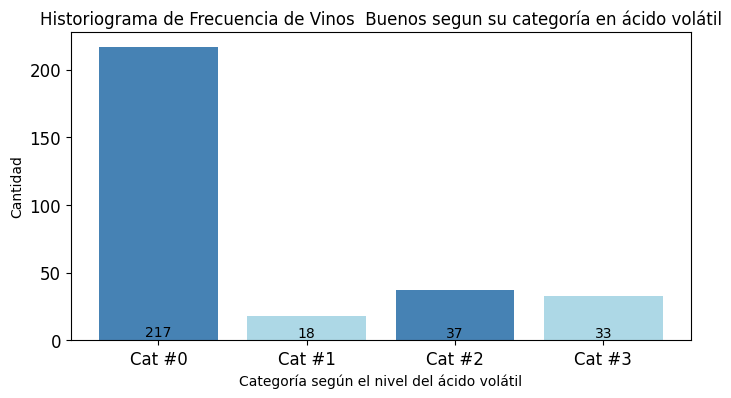

In [24]:
plt.figure(figsize=(8, 4))
plt.title('Historiograma de Frecuencia de Vinos  Buenos segun su categoría en ácido volátil')
vinosbuenoCat0 = len(vinos.loc[(vinos['quality'] == 1) & (vinos['vol_rec'] == 0)])
vinosbuenoCat1 = len(vinos.loc[(vinos['quality'] == 1) & (vinos['vol_rec'] == 1)])
vinosbuenoCat2 = len(vinos.loc[(vinos['quality'] == 1) & (vinos['vol_rec'] == 2)])
vinosbuenoCat3 = len(vinos.loc[(vinos['quality'] == 1) & (vinos['vol_rec'] == 3)])


total = 415 + 66 + 41 + 38

plt.bar(['Cat #0', 'Cat #1', 'Cat #2', 'Cat #3'], [vinosbuenoCat0, vinosbuenoCat1, vinosbuenoCat2, vinosbuenoCat3], color=['#4682B4', '#ADD8E6'])
for i, v in enumerate([vinosbuenoCat0, vinosbuenoCat1, vinosbuenoCat2, vinosbuenoCat3]):
    plt.text(i, v/total, str(v), color='black', ha='center', va='bottom')

plt.xlabel('Categoría según el nivel del ácido volátil')
plt.ylabel('Cantidad')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

# Análisis





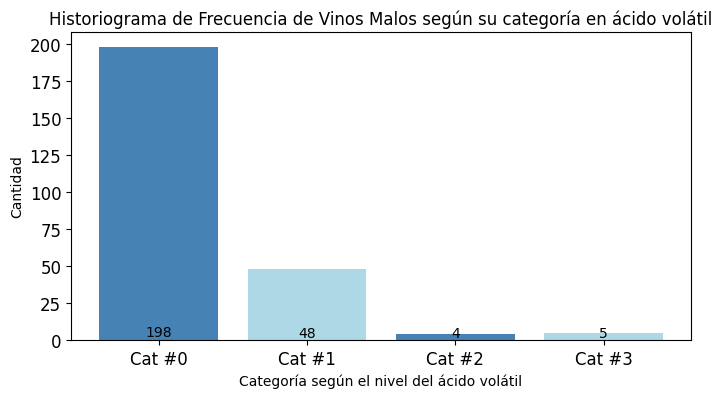

In [25]:
plt.figure(figsize=(8, 4))
plt.title('Historiograma de Frecuencia de Vinos Malos según su categoría en ácido volátil')

vinosmaloCat0 = len(vinos.loc[(vinos['quality'] == 0) & (vinos['vol_rec'] == 0)])
vinosmaloCat1 = len(vinos.loc[(vinos['quality'] == 0) & (vinos['vol_rec'] == 1)])
vinosmaloCat2 = len(vinos.loc[(vinos['quality'] == 0) & (vinos['vol_rec'] == 2)])
vinosmaloCat3 = len(vinos.loc[(vinos['quality'] == 0) & (vinos['vol_rec'] == 3)])


total = 415 + 66 + 41 + 38

plt.bar(['Cat #0', 'Cat #1', 'Cat #2', 'Cat #3'], [vinosmaloCat0, vinosmaloCat1, vinosmaloCat2, vinosmaloCat3], color=['#4682B4', '#ADD8E6'])
for i, v in enumerate([vinosmaloCat0, vinosmaloCat1, vinosmaloCat2, vinosmaloCat3]):
    plt.text(i, v/total, str(v), color='black', ha='center', va='bottom')

plt.xlabel('Categoría según el nivel del ácido volátil')
plt.ylabel('Cantidad')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [26]:
from optbinning import ContinuousOptimalBinning

# Crear el objeto ContinuousOptimalBinning para la variable 'acidez volátil'
optb_alcohol = ContinuousOptimalBinning(name='alcohol', dtype='numerical', max_n_bins=4)

# Ajustar el binning óptimo utilizando los datos de 'acidez volátil' y la variable objetivo
optb_alcohol.fit(vinos['alcohol'].values, vinos['quality'].values)

alcohol_transform_bins = optb_alcohol.transform(vinos['alcohol'].values, metric="bins")
vinos['alcohol_rec'] = alcohol_transform_bins





In [27]:
vinos['alcohol_rec'].value_counts()

[9.85, 11.85)    274
(-inf, 9.65)     178
[11.85, inf)      65
[9.65, 9.85)      43
Name: alcohol_rec, dtype: int64

In [28]:
mapping = {
    '[9.85, 11.85)': 0,
    '(-inf, 9.65)': 1,
    '[11.85, inf)': 2,
    '[9.65, 9.85)': 3
}
vinos['alcohol_rec'] = vinos['alcohol_rec'].replace(mapping)
vinos['alcohol_rec'].value_counts()


0    274
1    178
2     65
3     43
Name: alcohol_rec, dtype: int64

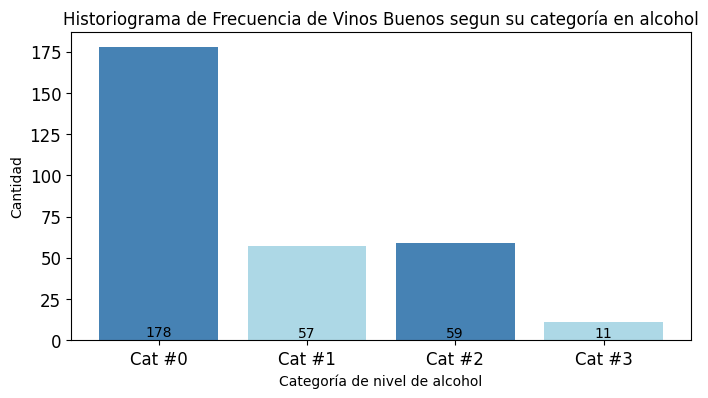

In [29]:
plt.figure(figsize=(8, 4))
plt.title('Historiograma de Frecuencia de Vinos Buenos segun su categoría en alcohol')
vinosbuenoAlc0 = len(vinos.loc[(vinos['quality'] == 1) & (vinos['alcohol_rec'] == 0)])
vinosbuenoAlc1 = len(vinos.loc[(vinos['quality'] == 1) & (vinos['alcohol_rec'] == 1)])
vinosbuenoAlc2 = len(vinos.loc[(vinos['quality'] == 1) & (vinos['alcohol_rec'] == 2)])
vinosbuenoAlc3 = len(vinos.loc[(vinos['quality'] == 1) & (vinos['alcohol_rec'] == 3)])

total = 415 + 66 + 41 + 38

plt.bar(['Cat #0', 'Cat #1', 'Cat #2', 'Cat #3'], [vinosbuenoAlc0, vinosbuenoAlc1, vinosbuenoAlc2, vinosbuenoAlc3], color=['#4682B4', '#ADD8E6'])
for i, v in enumerate([vinosbuenoAlc0, vinosbuenoAlc1, vinosbuenoAlc2, vinosbuenoAlc3]):
    plt.text(i, v/total, str(v), color='black', ha='center', va='bottom')

plt.xlabel('Categoría de nivel de alcohol')
plt.ylabel('Cantidad')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

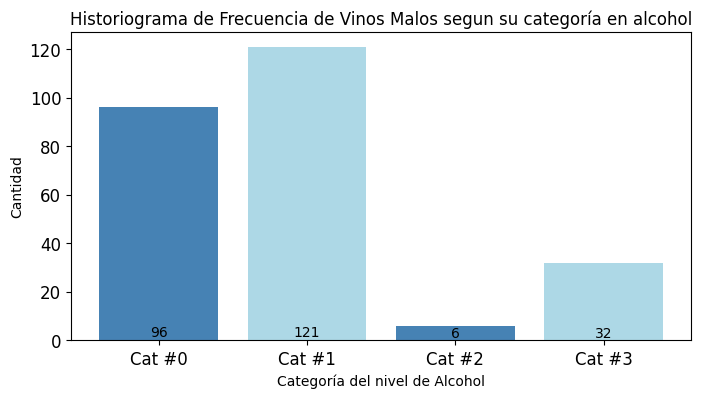

In [30]:
plt.figure(figsize=(8, 4))
plt.title('Historiograma de Frecuencia de Vinos Malos segun su categoría en alcohol')

vinosmaloAlc0 = len(vinos.loc[(vinos['quality'] == 0) & (vinos['alcohol_rec'] == 0)])
vinosmaloAlc1 = len(vinos.loc[(vinos['quality'] == 0) & (vinos['alcohol_rec'] == 1)])
vinosmaloAlc2 = len(vinos.loc[(vinos['quality'] == 0) & (vinos['alcohol_rec'] == 2)])
vinosmaloAlc3 = len(vinos.loc[(vinos['quality'] == 0) & (vinos['alcohol_rec'] == 3)])

total = 415 + 66 + 41 + 38

plt.bar(['Cat #0', 'Cat #1', 'Cat #2', 'Cat #3'], [vinosmaloAlc0, vinosmaloAlc1, vinosmaloAlc2, vinosmaloAlc3], color=['#4682B4', '#ADD8E6'])
for i, v in enumerate([vinosmaloAlc0, vinosmaloAlc1, vinosmaloAlc2, vinosmaloAlc3]):
    plt.text(i, v/total, str(v), color='black', ha='center', va='bottom')

plt.xlabel('Categoría del nivel de Alcohol')
plt.ylabel('Cantidad')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [31]:
optb_sulph = ContinuousOptimalBinning(name='sulphates', dtype='numerical', max_n_bins=4)

# Ajustar el binning óptimo utilizando los datos de 'acidez volátil' y la variable objetivo
optb_sulph.fit(vinos['sulphates'].values, vinos['quality'].values)

optb_sulph_transform_bins = optb_sulph.transform(vinos['sulphates'].values, metric="bins")
vinos['sulph_rec'] = optb_sulph_transform_bins

vinos['sulph_rec'].value_counts()

[0.52, inf)     471
(-inf, 0.47)     32
[0.50, 0.52)     29
[0.47, 0.50)     28
Name: sulph_rec, dtype: int64

In [32]:
mapping = {
    '[0.52, inf)': 0,
    '(-inf, 0.47)': 1,
    '[0.50, 0.52)': 2,
    '[0.47, 0.50)': 3
}
vinos['sulph_rec'] = vinos['sulph_rec'].replace(mapping)
vinos['sulph_rec'].value_counts()

0    471
1     32
2     29
3     28
Name: sulph_rec, dtype: int64

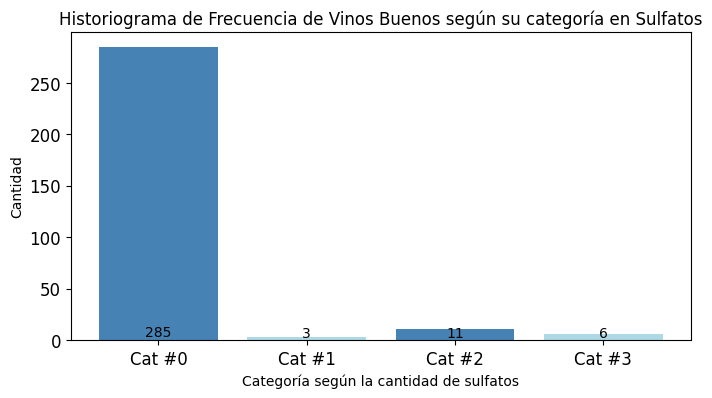

In [33]:
plt.figure(figsize=(8, 4))
plt.title('Historiograma de Frecuencia de Vinos Buenos según su categoría en Sulfatos')
vinosbuenoSulph0 = len(vinos.loc[(vinos['quality'] == 1) & (vinos['sulph_rec'] == 0)])
vinosbuenoSulph1 = len(vinos.loc[(vinos['quality'] == 1) & (vinos['sulph_rec'] == 1)])
vinosbuenoSulph2 = len(vinos.loc[(vinos['quality'] == 1) & (vinos['sulph_rec'] == 2)])
vinosbuenoSulph3 = len(vinos.loc[(vinos['quality'] == 1) & (vinos['sulph_rec'] == 3)])

total = 415 + 66 + 41 + 38

plt.bar(['Cat #0', 'Cat #1', 'Cat #2', 'Cat #3'], [vinosbuenoSulph0, vinosbuenoSulph1, vinosbuenoSulph2, vinosbuenoSulph3], color=['#4682B4', '#ADD8E6'])
for i, v in enumerate([vinosbuenoSulph0, vinosbuenoSulph1, vinosbuenoSulph2, vinosbuenoSulph3]):
    plt.text(i, v/total, str(v), color='black', ha='center', va='bottom')

plt.xlabel('Categoría según la cantidad de sulfatos')
plt.ylabel('Cantidad')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

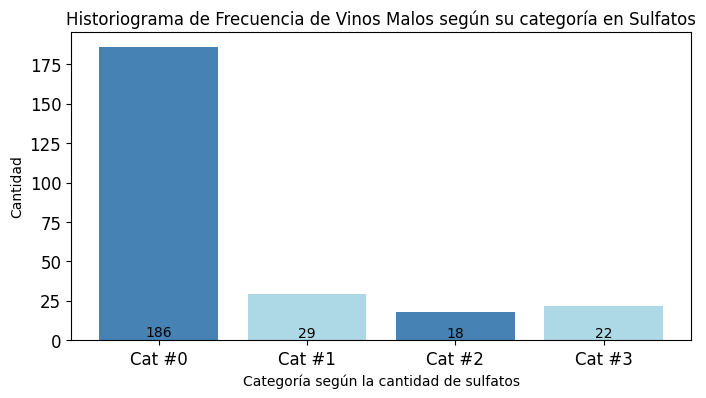

In [34]:
plt.figure(figsize=(8, 4))
plt.title('Historiograma de Frecuencia de Vinos Malos según su categoría en Sulfatos')

vinosmaloSulph0 = len(vinos.loc[(vinos['quality'] == 0) & (vinos['sulph_rec'] == 0)])
vinosmaloSulph1 = len(vinos.loc[(vinos['quality'] == 0) & (vinos['sulph_rec'] == 1)])
vinosmaloSulph2 = len(vinos.loc[(vinos['quality'] == 0) & (vinos['sulph_rec'] == 2)])
vinosmaloSulph3 = len(vinos.loc[(vinos['quality'] == 0) & (vinos['sulph_rec'] == 3)])
total = 415 + 66 + 41 + 38

plt.bar(['Cat #0', 'Cat #1', 'Cat #2', 'Cat #3'], [vinosmaloSulph0, vinosmaloSulph1, vinosmaloSulph2, vinosmaloSulph3], color=['#4682B4', '#ADD8E6'])
for i, v in enumerate([vinosmaloSulph0, vinosmaloSulph1, vinosmaloSulph2, vinosmaloSulph3]):
    plt.text(i, v/total, str(v), color='black', ha='center', va='bottom')

plt.xlabel('Categoría según la cantidad de sulfatos')
plt.ylabel('Cantidad')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

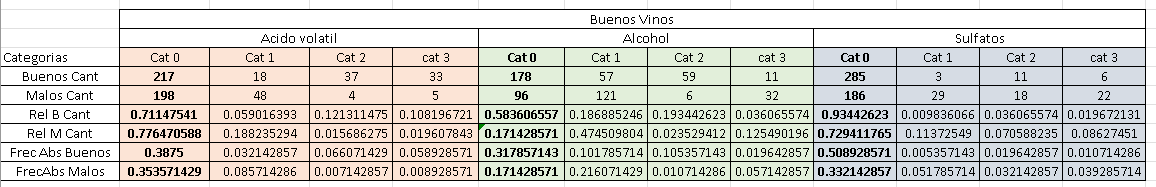

Como se puede observar se los vinos que pertenecen a la categoría 0 en alcohol tienen más probabilidad  de ser Buenos. Lo mismo ocurre para la categoría 0 de los sulfatos. El mayor cambio que se puede observar es que los vinos malos tienden a ser categoría 1 en Alcohol, mientras que los vinos buenos tienden a ser categoría 0 o 2.


#Aplicación de la Regresion Logística

Usamos este tipo de regresión debido a que la variable Y, es una variable categórica dicotómica que define la calidad de los vinos Rojos.

Este es el resultado de la regresión lineal más efectiva para el modelo, ya que en esta se han eliminado las variables que no tenían significancia para el modelo, como pueden ser: ácido cítrico, pH y densidad.


In [35]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Obtener los datos (X e y) para la regresión logística multinomial
X = vinos[['volatile acidity', 'alcohol', 'sulphates', 'chlorides', 'total sulfur dioxide']]
y = vinos['quality']

# Agregar una columna de unos a X para el intercepto del modelo
X = sm.add_constant(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión logística multinomial con statsmodels
model = sm.MNLogit(y_train, X_train)
result = model.fit()

# Obtener el resumen del modelo
summary = result.summary()

# Imprimir el resumen
print(summary)






Optimization terminated successfully.
         Current function value: 0.529862
         Iterations 6
                          MNLogit Regression Results                          
Dep. Variable:                quality   No. Observations:                  448
Model:                        MNLogit   Df Residuals:                      442
Method:                           MLE   Df Model:                            5
Date:                Tue, 25 Jul 2023   Pseudo R-squ.:                  0.2307
Time:                        05:08:15   Log-Likelihood:                -237.38
converged:                       True   LL-Null:                       -308.56
Covariance Type:            nonrobust   LLR p-value:                 5.636e-29
           quality=1       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -7.9570      1.521     -5.230      0.000     -10.939      -4.975

Debido a que los coeficientes en una regresión Logistica vienen dado por el aumento unitario en los ODDS Ratios se debe aplicar el exponencial del exponente con el fin de obtener la tasa en el aumento unitario verdadero.

In [36]:
params = result.params
# Aplicar exponenciación a los coeficientes para interpretarlos
coeficientes_interpretados = np.exp(params)
print(coeficientes_interpretados)

                              0
const                  0.000350
volatile acidity       0.046186
alcohol                2.148384
sulphates             81.652968
chlorides              0.000752
total sulfur dioxide   0.992541


# Por cada aumento en la calidad:

La acidez volátil aumenta en 0.04 puntos.
El contenido de alcohol aumenta 2.14 puntos
Los sulfatos aumentan en 81.65 en la medida que están.
El dioxido de sulfuro aumenta en 1 unidad.
Los cloruros aumentan muy poco.


Estos lecturas no son del todo representativas y correctas ya que el dataset contaba con 6 calidad de vinos y decidimos agruparlas en solo 2. Esto ocurrio debido a que la cantidad de vinos de algunas calidades era muy baja por lo que no era representativo a la hora de hacer una regresión. Esto porque la regresión necesita como referencia una categoría (la primera o última según el orden) y al tener muy pocos datos, no se podían obtener resultados coherentes y representativos.

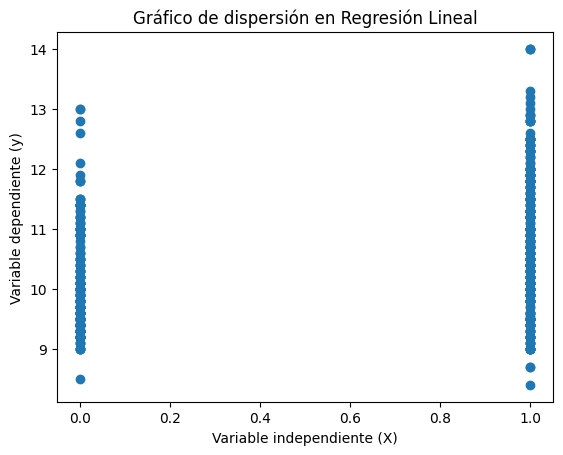

In [38]:
plt.scatter(vinos['quality'], vinos['alcohol'])
plt.xlabel('Variable independiente (X)')
plt.ylabel('Variable dependiente (y)')
plt.title('Gráfico de dispersión en Regresión Lineal')
plt.show()

Los vinos buenos tienden a tener una mayor concentración de alcohol y tienen una moda entre 11 y 12.
